In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.__version__

'0.11.2'

In [7]:
covid_df = pd.read_csv('C:\\Users\\admin3.URTREK\\Documents\\Data_science\\DataScience_New\\DataFrame\\covid\\covid.csv')

In [8]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,3618,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,3619,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,3620,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


<AxesSubplot:xlabel='daily_confirmed_per_hundred', ylabel='country'>

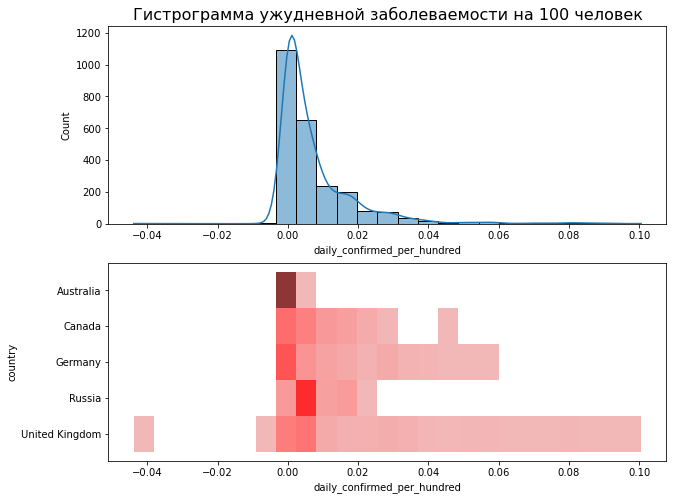

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Гистрограмма ужудневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
)

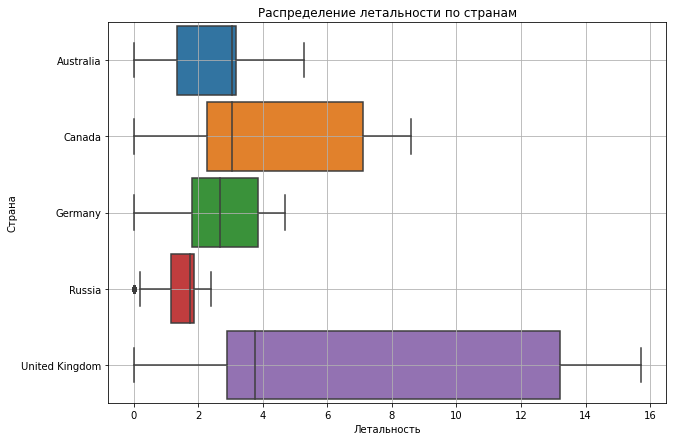

In [12]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [21]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам')

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 720x504 with 0 Axes>

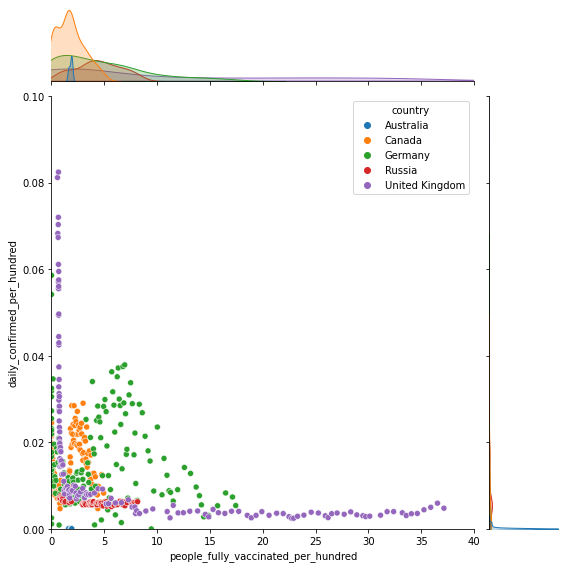

In [26]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [43]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68137.0,70658.0,72243.0,72969.0,73274.0,72471.0,73775.0,76420.0,79809.0,84379.0
Canada,NaN,718.0,1509.0,2399.0,2792.0,2378.0,2122.0,2980.0,3697.0,4581.0,...,363383.0,370780.0,374185.0,372961.0,367949.0,364132.0,356350.0,357964.0,354418.0,348417.0
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,702055.0,715587.0,726099.0,726519.0,693761.0,662852.0,674535.0,687870.0,695444.0,686385.0
Russia,NaN,NaN,3357.0,3357.0,3357.0,3357.0,3357.0,3357.0,3357.0,12592.0,...,340575.0,310859.0,365931.0,357454.0,387827.0,358224.0,392708.0,367571.0,377834.0,277909.0
United Kingdom,84117.0,84117.0,84117.0,84117.0,84117.0,84117.0,84117.0,78831.0,73544.0,68258.0,...,534776.0,539472.0,558584.0,567646.0,580439.0,591301.0,595544.0,595836.0,594987.0,572132.0


Text(0.5, 1.0, 'Тепловая карта вакцинации')

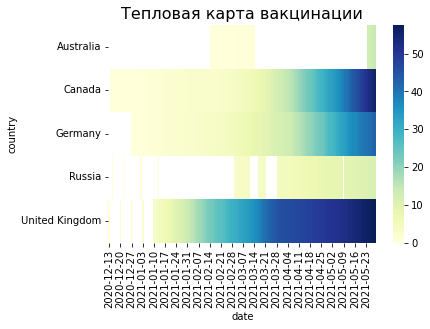

In [28]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16)

Text(0.5, 1.0, 'Тепловая карта заболеваемости')

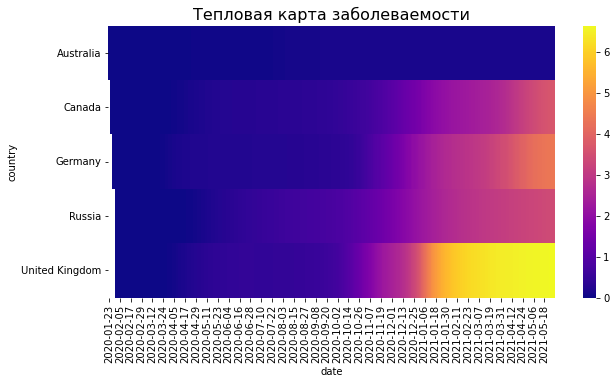

In [33]:
#задание 6.4
croped_covid_df['confirmed_per_hundred']=croped_covid_df['confirmed']/croped_covid_df['population']*100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)

In [35]:
croped_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2439
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           2440 non-null   int64  
 1   date                                 2440 non-null   object 
 2   country                              2440 non-null   object 
 3   confirmed                            2440 non-null   float64
 4   deaths                               2440 non-null   float64
 5   recovered                            2440 non-null   float64
 6   active                               2440 non-null   float64
 7   daily_confirmed                      2435 non-null   float64
 8   daily_deaths                         2435 non-null   float64
 9   daily_recovered                      2435 non-null   float64
 10  total_vaccinations                   649 non-null    float64
 11  people_vaccinated             

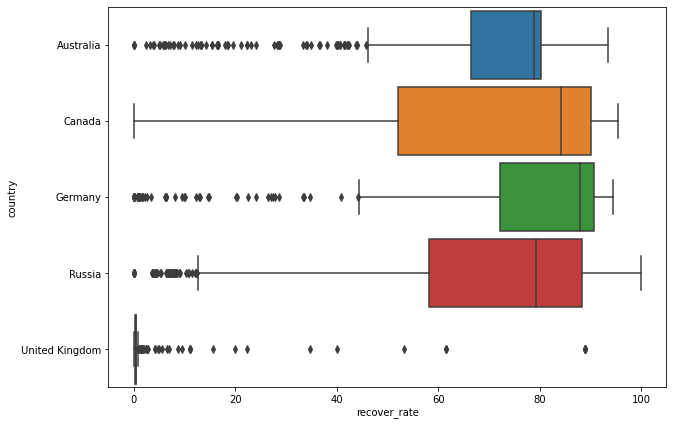

In [42]:
#задание 6.5
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)